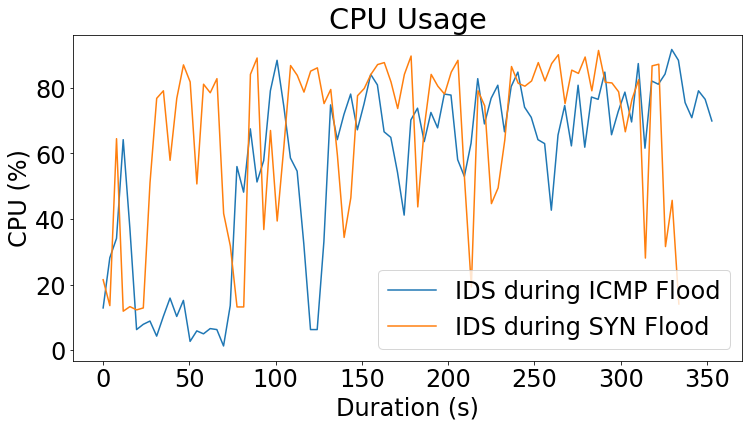

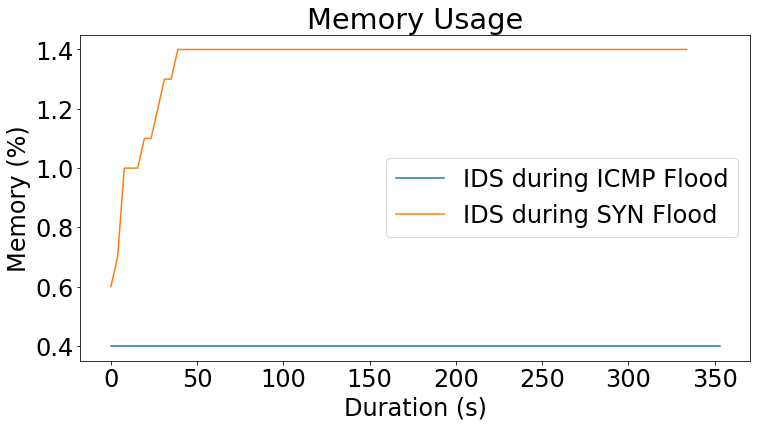

In [41]:

import matplotlib.pyplot as plt




durations = {
"1322":"352.89360",
"32247":"333.76345"
#"372":"278.27138"

}

All_Names = {
"1322":"IDS during ICMP Flood",
"32247":"IDS during SYN Flood"
#"372":"IDS during HTTP Flood"
}



data = []
with open('ICMP_SYN_DOS_TOP.txt', 'r') as file:
    for line in file:
        if 'root' in line:
            fields = line.split()
            data.append(fields)


# Separate the data for each root process
root_processes = {}
for entry in data:
    pid = entry[0]
    if pid not in root_processes:
        root_processes[pid] = {'cpu': [], 'mem': []}
    root_processes[pid]['cpu'].append(float(entry[8]))
    root_processes[pid]['mem'].append(float(entry[9]))

# Plotting CPU usage
plt.rcParams.update({'font.size': 24})

#plt.figure(figsize=(10, 5))
plt.figure(figsize=(12, 6))
plt.title('CPU Usage')
plt.xlabel('Duration (s)')
plt.ylabel('CPU (%)')

for pid, process_data in root_processes.items():
    # Get the duration for the process
    duration = float(durations.get(pid, 0))
    # Create the x-axis values representing the duration
    time_values = [duration * (i / (len(process_data['cpu']) - 1)) for i in range(len(process_data['cpu']))]
    #plt.plot(time_values, process_data['cpu'], label='Process ' + pid)
    plt.plot(time_values, process_data['cpu'], label=All_Names[pid])

    
plt.legend()
plt.savefig('ICMP_SYN_CPU_RQ1.pdf')
plt.show()

# Plotting memory usage
# plt.figure(figsize=(10, 5))
plt.figure(figsize=(12, 6))
plt.title('Memory Usage')
plt.xlabel('Duration (s)')
plt.ylabel('Memory (%)')

for pid, process_data in root_processes.items():
    # Get the duration for the process
    duration = float(durations.get(pid, 0))
    # Create the x-axis values representing the duration
    time_values = [duration * (i / (len(process_data['mem']) - 1)) for i in range(len(process_data['mem']))]
    #plt.plot(time_values, process_data['mem'], label='Process ' + pid)
    plt.plot(time_values, process_data['mem'], label=All_Names[pid])

plt.legend()
plt.savefig('ICMP_SYN_DOS_MEM_RQ1.pdf')
plt.show()


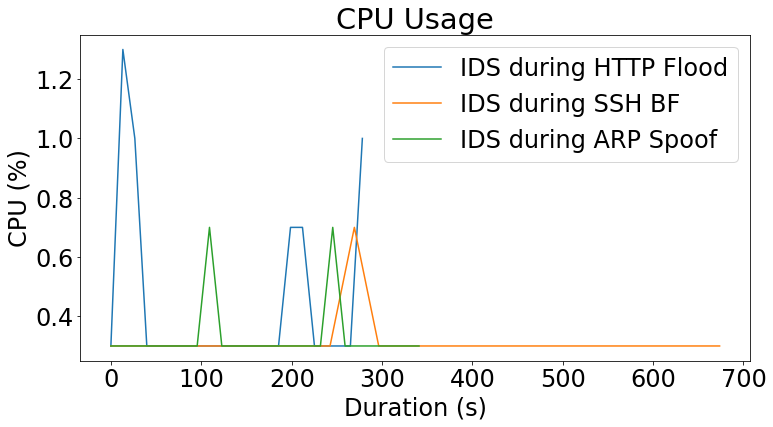

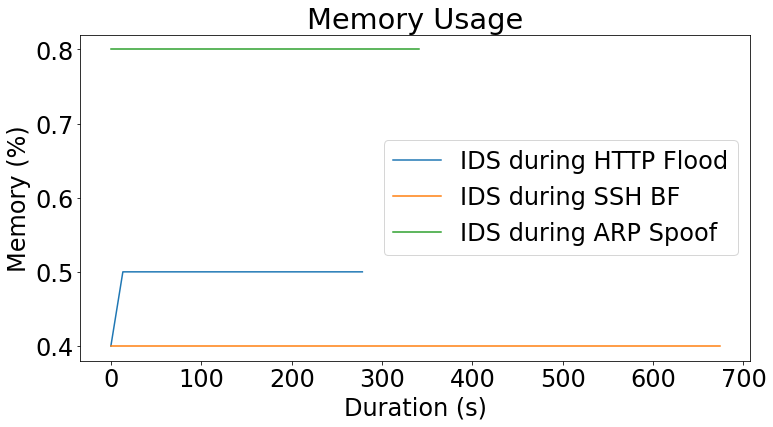

In [44]:

import matplotlib.pyplot as plt




durations = {
"372":"278.27138",
"23131":"673.58788",
"12521":"340.97310"

}

All_Names = {
"372":"IDS during HTTP Flood",
"23131":"IDS during SSH BF",
"12521":"IDS during ARP Spoof"   
}



data = []
with open('HTTP_SSH_ARP_TOP.txt', 'r') as file:
    for line in file:
        if 'root' in line:
            fields = line.split()
            data.append(fields)


# Separate the data for each root process
root_processes = {}
for entry in data:
    pid = entry[0]
    if pid not in root_processes:
        root_processes[pid] = {'cpu': [], 'mem': []}
    root_processes[pid]['cpu'].append(float(entry[8]))
    root_processes[pid]['mem'].append(float(entry[9]))

# Plotting CPU usage
plt.rcParams.update({'font.size': 24})


#plt.figure(figsize=(10, 5))
plt.figure(figsize=(12, 6))
plt.title('CPU Usage')
plt.xlabel('Duration (s)')
plt.ylabel('CPU (%)')

for pid, process_data in root_processes.items():
    # Get the duration for the process
    duration = float(durations.get(pid, 0))
    # Create the x-axis values representing the duration
    time_values = [duration * (i / (len(process_data['cpu']) - 1)) for i in range(len(process_data['cpu']))]
    #plt.plot(time_values, process_data['cpu'], label='Process ' + pid)
    plt.plot(time_values, process_data['cpu'], label=All_Names[pid])

plt.legend()
plt.savefig('HTTP_SSHBF_ARP_CPU_RQ1.pdf')
plt.show()

# Plotting memory usage
#plt.figure(figsize=(10, 5))
plt.figure(figsize=(12, 6))
plt.title('Memory Usage')
plt.xlabel('Duration (s)')
plt.ylabel('Memory (%)')

for pid, process_data in root_processes.items():
    # Get the duration for the process
    duration = float(durations.get(pid, 0))
    # Create the x-axis values representing the duration
    time_values = [duration * (i / (len(process_data['mem']) - 1)) for i in range(len(process_data['mem']))]
    #plt.plot(time_values, process_data['mem'], label='Process ' + pid)
    plt.plot(time_values, process_data['mem'], label=All_Names[pid])

plt.legend()
plt.savefig('HTTP_SSHBF_ARP_MEM_RQ1.pdf')
plt.show()


# DOS Attacks

## ICMP Flood


### Attack on eth0 connection for approx 5 minutes
Attacker details:
```
command: sudo ./datetime.sh sudo hping3 --icmp --flood 192.168.178.81
Timestamp START: 05/15-18:19:09.127030579
Timestamp END: 05/15-18:24:20.736741747

10128751 packets transmitted
```
 
Defender: 

Snort rule: <br>
alert icmp any any -> $HOME_NET any (msg:"ICMP flood"; sid:1000001; rev:1; classtype:icmp-event; detection_filter:track by_dst, count 500, seconds 3;)
<br>
command: <br>
sudo snort -A console -c /etc/snort/snort.conf -i eth0 -l ./Logs/icmpFlood/

```
response time: Immediate (less than 1 seconds)

Snort stats:
Run time for packet processing was 352.89360 seconds
Snort processed 2897481 packets.
Snort ran for 0 days 0 hours 5 minutes 52 seconds
   Pkts/min:       579496
   Pkts/sec:         8231

Packet I/O Totals:
   Received:     19033615
   Analyzed:      2897481 ( 15.223%)
    Dropped:     16136076 ( 45.881%)
   Filtered:            0 (  0.000%)
Outstanding:     16136134 ( 84.777%)
   Injected:            0


Action Stats:
     Alerts:      2686664 ( 92.724%)
     Logged:      2686664 ( 92.724%)
     Passed:            0 (  0.000%)
Limits:
      Match:            0
      Queue:            0
        Log:            0
      Event:          498
      Alert:            0
Verdicts:
      Allow:      2897481 ( 15.223%)
      Block:            0 (  0.000%)
    Replace:            0 (  0.000%)
  AllowFlow:            0 (  0.000%)
  BlockFlow:            0 (  0.000%)
     Ignore:            0 (  0.000%)
      Retry:            0 (  0.000%)

```


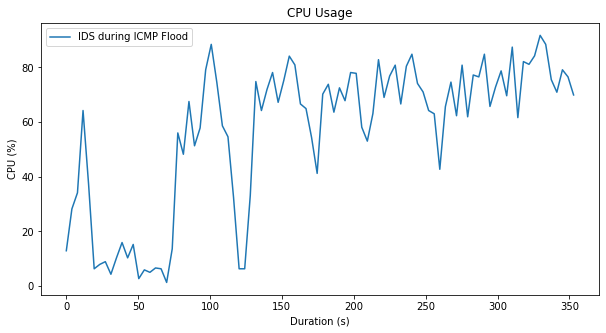

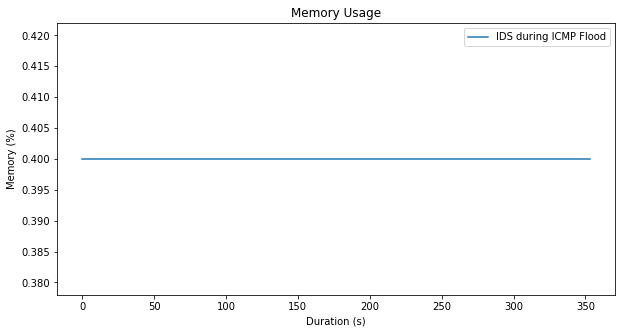

In [2]:
import matplotlib.pyplot as plt


    
durations = {
"1322":"352.89360",
}

#plt.savefig('ICMP_Flood_Logs/ICMP_CPU_RQ1.pdf') 
#plt.savefig('ICMP_Flood_Logs/ICMP_MEM_RQ1.pdf') 

data = []
with open('ICMP_Flood_Logs/ICMP_Flood_top.txt', 'r') as file:
    for line in file:
        if 'root' in line:
            fields = line.split()
            data.append(fields)


# Separate the data for each root process
root_processes = {}
for entry in data:
    pid = entry[0]
    if pid not in root_processes:
        root_processes[pid] = {'cpu': [], 'mem': []}
    root_processes[pid]['cpu'].append(float(entry[8]))
    root_processes[pid]['mem'].append(float(entry[9]))

# Plotting CPU usage
plt.figure(figsize=(10, 5))
plt.title('CPU Usage')
plt.xlabel('Duration (s)')
plt.ylabel('CPU (%)')

for pid, process_data in root_processes.items():
    # Get the duration for the process
    duration = float(durations.get(pid, 0))
    # Create the x-axis values representing the duration
    time_values = [duration * (i / (len(process_data['cpu']) - 1)) for i in range(len(process_data['cpu']))]
    #plt.plot(time_values, process_data['cpu'], label='Process ' + pid)
    plt.plot(time_values, process_data['cpu'], label='IDS during ICMP Flood')

plt.legend()
plt.savefig('ICMP_Flood_Logs/ICMP_CPU_RQ1.pdf') 
plt.show()

# Plotting memory usage
plt.figure(figsize=(10, 5))
plt.title('Memory Usage')
plt.xlabel('Duration (s)')
plt.ylabel('Memory (%)')

for pid, process_data in root_processes.items():
    # Get the duration for the process
    duration = float(durations.get(pid, 0))
    # Create the x-axis values representing the duration
    time_values = [duration * (i / (len(process_data['mem']) - 1)) for i in range(len(process_data['mem']))]
    #plt.plot(time_values, process_data['mem'], label='Process ' + pid)plt.plot(time_values, process_data['mem'], label='Process ' + pid)
    plt.plot(time_values, process_data['mem'], label='IDS during ICMP Flood')

plt.legend()
plt.savefig('ICMP_Flood_Logs/ICMP_MEM_RQ1.pdf') 
plt.show()


## TCP SYN Flood

### Attack on eth0 connection for approx 5 minutes

Attacker:

```
command: sudo ./datetime.sh sudo hping3 -S -p 80 --flood 192.168.178.81
Timestamp START: 05/15-20:27:49.230568568
Timestamp END: 05/15-20:33:00.241393698

8973979 packets transmitted


```


Defender: 

response time: 20:27:49.230568568 - 20:27:50.306218   (approx 1 sec)

Snort rule: <br>
alert tcp any any -> $HOME_NET 80 (flags: S; msg:"Possible DoS Attack Type : SYN flood"; flow:stateless; sid:1000002; detection_filter:track by_dst, count 20, seconds 10;)

command: <br>
sudo snort -A console -c /etc/snort/snort.conf -i eth0 -l ./Logs/tcpFlood/

```
Run time for packet processing was 333.76345 seconds
Snort processed 6350191 packets.
Snort ran for 0 days 0 hours 5 minutes 33 seconds
   Pkts/min:      1270038
   Pkts/sec:        19069
==================================
Packet I/O Totals:
   Received:     18273596
   Analyzed:      6350191 ( 34.751%)
    Dropped:     11923351 ( 39.485%)
   Filtered:            0 (  0.000%)
Outstanding:     11923405 ( 65.249%)
   Injected:            0
===============================================================================
Action Stats:
     Alerts:      2971030 ( 46.786%)
     Logged:      2971030 ( 46.786%)
     Passed:            0 (  0.000%)
Limits:
      Match:            0
      Queue:            0
        Log:            0
      Event:          805
      Alert:            0
Verdicts:
      Allow:      6350191 ( 34.751%)
      Block:            0 (  0.000%)
    Replace:            0 (  0.000%)
  AllowFlow:            0 (  0.000%)
  BlockFlow:            0 (  0.000%)
     Ignore:            0 (  0.000%)
      Retry:            0 (  0.000%)
===============================================================================



```






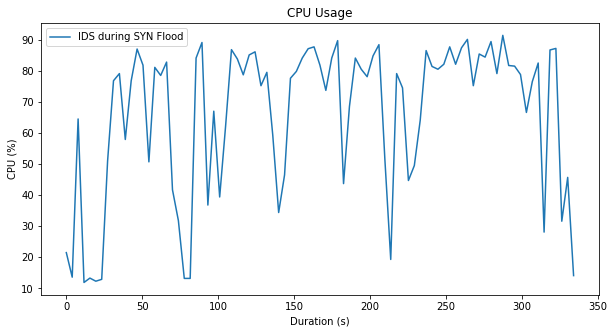

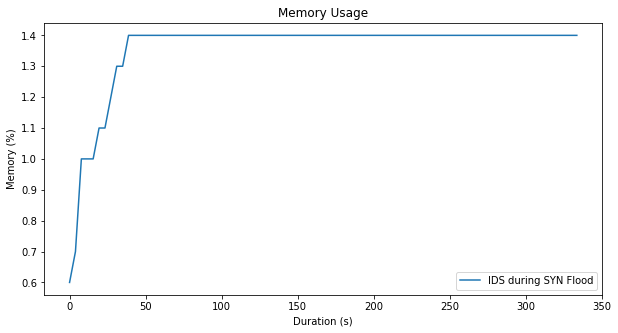

In [3]:
import matplotlib.pyplot as plt


    
durations = {
"32247":"333.76345",
}


data = []
with open('TCP_SYN_FLOOD_Logs/SYN_FLOOD_top.txt', 'r') as file:
    for line in file:
        if 'root' in line:
            fields = line.split()
            data.append(fields)


# Separate the data for each root process
root_processes = {}
for entry in data:
    pid = entry[0]
    if pid not in root_processes:
        root_processes[pid] = {'cpu': [], 'mem': []}
    root_processes[pid]['cpu'].append(float(entry[8]))
    root_processes[pid]['mem'].append(float(entry[9]))

# Plotting CPU usage
plt.figure(figsize=(10, 5))
plt.title('CPU Usage')
plt.xlabel('Duration (s)')
plt.ylabel('CPU (%)')

for pid, process_data in root_processes.items():
    # Get the duration for the process
    duration = float(durations.get(pid, 0))
    # Create the x-axis values representing the duration
    time_values = [duration * (i / (len(process_data['cpu']) - 1)) for i in range(len(process_data['cpu']))]
    #plt.plot(time_values, process_data['cpu'], label='Process ' + pid)
    plt.plot(time_values, process_data['cpu'], label='IDS during SYN Flood')

plt.legend()
plt.savefig('TCP_SYN_FLOOD_Logs/SYN_CPU_RQ1.pdf') 
plt.show()

# Plotting memory usage
plt.figure(figsize=(10, 5))
plt.title('Memory Usage')
plt.xlabel('Duration (s)')
plt.ylabel('Memory (%)')

for pid, process_data in root_processes.items():
    # Get the duration for the process
    duration = float(durations.get(pid, 0))
    # Create the x-axis values representing the duration
    time_values = [duration * (i / (len(process_data['mem']) - 1)) for i in range(len(process_data['mem']))]
    #plt.plot(time_values, process_data['mem'], label='Process ' + pid)
    plt.plot(time_values, process_data['mem'], label='IDS during SYN Flood')

plt.legend()
plt.savefig('TCP_SYN_FLOOD_Logs/SYN_MEM_RQ1.pdf') 
plt.show()


## HTTP flood


Attacker:
command: slowhttptest -c 1000 -H -g -o slowhttp -i 10 -r 200 -t GET -u http://192.168.178.81:5000/ -x 24 -p 3

Timestamp START: 05/15-20:59:39.419433906
Timestamp END: 05/15-21:03:40.436763490

```

        slowhttptest version 1.8.2
 - https://github.com/shekyan/slowhttptest -
test type:                        SLOW HEADERS
number of connections:            1000
URL:                              http://192.168.178.81:5000/
verb:                             GET
cookie:
Content-Length header value:      4096
follow up data max size:          52
interval between follow up data:  10 seconds
connections per seconds:          200
probe connection timeout:         3 seconds
test duration:                    240 seconds
using proxy:                      no proxy

Mon May 15 21:03:39 2023:
slow HTTP test status on 240th second:

initializing:        0
pending:             0
connected:           374
error:               0
closed:              626
service available:   NO

```

```
-c 1000: Sets the target number of connections to 1000.
-H: Enables slow headers mode, which simulates a Slowloris attack.
-g: Generates statistics with socket state changes.
-o slowhttp: Specifies the output file prefix for the statistics.
-i 10: Sets the interval between follow-up data to 10 seconds.
-r 200: Sets the rate of connections per second to 200.
-t GET: Specifies the HTTP verb to use in the request, which is GET.
-u http://192.168.178.81:5000/: Sets the absolute URL of the target to http://192.168.178.81:5000/.
-x 24: Sets the maximum length of each randomized name/value pair of follow-up data per tick to 24 characters.
-p 3: Sets the timeout to wait for an HTTP response on the probe connection to 3 seconds.

The rate metrics associated with this command are as follows:

* Target Number of Connections: The -c parameter sets the number of connections to 1000. This means that the attack will be performed using 1000 concurrent connections.

* Rate of Connections per Second: The -r parameter sets the rate of connections per second to 200. This determines how quickly the connections will be established.

* Interval Between Follow-up Data: The -i parameter sets the interval between sending follow-up data to 10 seconds. After the initial request, additional data will be sent at this interval.

```




Defender:

response time:  20:59:39.730078 -  20:59:39.419433906 => 0.3 seconds

Snort rule: <br>

alert tcp any any -> $HOME_NET 5000 (msg:"FLASK HTTP Flood Attempt"; threshold: type threshold, track by_src, count 100, seconds 10; sid:40000056; rev:2;)

command: <br>
sudo snort -A console -c /etc/snort/snort.conf -i eth0 -l ./Logs/httpFlood/

```
Run time for packet processing was 278.27138 seconds
Snort processed 44702 packets.
Snort ran for 0 days 0 hours 4 minutes 38 seconds
   Pkts/min:        11175
   Pkts/sec:          160
===============================================================================
Packet I/O Totals:
   Received:        44746
   Analyzed:        44702 ( 99.902%)
    Dropped:            0 (  0.000%)
   Filtered:            0 (  0.000%)
Outstanding:           44 (  0.098%)
   Injected:            0
===============================================================================
Action Stats:
     Alerts:          120 (  0.268%)
     Logged:          120 (  0.268%)
     Passed:            0 (  0.000%)
Limits:
      Match:            0
      Queue:            0
        Log:            0
      Event:        13977
      Alert:            0
Verdicts:
      Allow:        44702 ( 99.902%)
      Block:            0 (  0.000%)
    Replace:            0 (  0.000%)
  AllowFlow:            0 (  0.000%)
  BlockFlow:            0 (  0.000%)
     Ignore:            0 (  0.000%)
      Retry:            0 (  0.000%)
===============================================================================


```


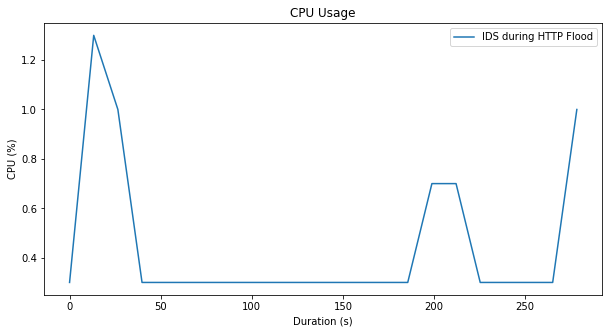

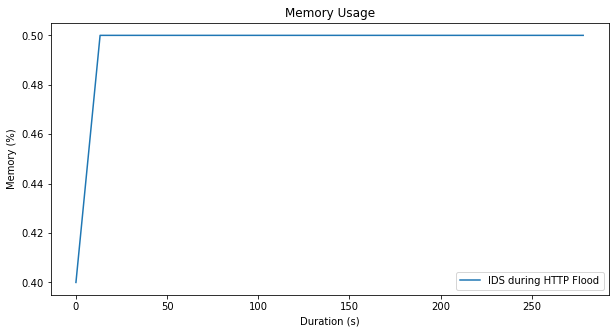

In [4]:
import matplotlib.pyplot as plt


    
durations = {
"372":"278.27138",
}


data = []
with open('HTTP_Flood_Logs/HTTP_FLOOD_top.txt', 'r') as file:
    for line in file:
        if 'root' in line:
            fields = line.split()
            data.append(fields)


# Separate the data for each root process
root_processes = {}
for entry in data:
    pid = entry[0]
    if pid not in root_processes:
        root_processes[pid] = {'cpu': [], 'mem': []}
    root_processes[pid]['cpu'].append(float(entry[8]))
    root_processes[pid]['mem'].append(float(entry[9]))

# Plotting CPU usage
plt.figure(figsize=(10, 5))
plt.title('CPU Usage')
plt.xlabel('Duration (s)')
plt.ylabel('CPU (%)')

for pid, process_data in root_processes.items():
    # Get the duration for the process
    duration = float(durations.get(pid, 0))
    # Create the x-axis values representing the duration
    time_values = [duration * (i / (len(process_data['cpu']) - 1)) for i in range(len(process_data['cpu']))]
    #plt.plot(time_values, process_data['cpu'], label='Process ' + pid)
    plt.plot(time_values, process_data['cpu'], label='IDS during HTTP Flood')

plt.legend()
plt.savefig('HTTP_Flood_Logs/HTTP_CPU_RQ1.pdf') 
plt.show()

# Plotting memory usage
plt.figure(figsize=(10, 5))
plt.title('Memory Usage')
plt.xlabel('Duration (s)')
plt.ylabel('Memory (%)')

for pid, process_data in root_processes.items():
    # Get the duration for the process
    duration = float(durations.get(pid, 0))
    # Create the x-axis values representing the duration
    time_values = [duration * (i / (len(process_data['mem']) - 1)) for i in range(len(process_data['mem']))]
    #plt.plot(time_values, process_data['mem'], label='Process ' + pid)
    plt.plot(time_values, process_data['mem'], label='IDS during HTTP Flood')

plt.legend()
plt.savefig('HTTP_Flood_Logs/HTTP_MEM_RQ1.pdf') 
plt.show()


# Auhentication 

## SSH attack

Attacker:

command:sudo ./datetime.sh sudo  hydra -l pi -P piPass2.txt ssh://192.168.178.81
<br>piPass2.txt: a wordlist file containing 1000 entries one of which is accually the pi's password
(crunch 5 5 0123456789 -t 25@@@ -o piPass2.txt   => 25879 is the pi password, this creates 1000 entries)

Timestamp START: 05/15-23:32:46.561211557
Timestamp END: 05/15-23:43:32.476090351

Normally per every SSH attemp every minute approximately 11 alerts are generated.

```
[DATA] max 16 tasks per 1 server, overall 16 tasks, 1000 login tries (l:1/p:1000), ~63
[DATA] attacking ssh://192.168.178.81:22/
[STATUS] 120.00 tries/min, 120 tries in 00:01h, 883 to do in 00:08h, 13 active
[STATUS] 92.00 tries/min, 276 tries in 00:03h, 727 to do in 00:08h, 13 active
[STATUS] 85.86 tries/min, 601 tries in 00:07h, 402 to do in 00:05h, 13 active
[22][ssh] host: 192.168.178.81   login: pi   password: 25879
1 of 1 target successfully completed, 1 valid password found
[WARNING] Writing restore file because 3 final worker threads did not complete un      til end.
[ERROR] 3 targets did not resolve or could not be connected
[ERROR] 0 target did not complete
```

Defender: 

response time: 23:32:57.044920 - 23:32:46.561211557  => 10.5 seconds - hydra preparation time => approx 1-2 sec

Snort rule:
alert tcp any any -> $HOME_NET 22 ( msg:"SSH Brute Force Attempt"; flow:established,to_server; content:"SSH"; nocase; offset:0; depth:4; detection_filter:track by_src, count 5, seconds 60; sid:10000015; rev:1;)

So alerts generated every minute 


command: sudo snort -A console -c /etc/snort/snort.conf -i eth0 -l ./Logs/sshAttack/


```
Run time for packet processing was 673.58788 seconds
Snort processed 34974 packets.
Snort ran for 0 days 0 hours 11 minutes 13 seconds
   Pkts/min:         3179
   Pkts/sec:           51

===============================================================================
Packet I/O Totals:
   Received:        35010
   Analyzed:        34974 ( 99.897%)
    Dropped:            0 (  0.000%)
   Filtered:            0 (  0.000%)
Outstanding:           36 (  0.103%)
   Injected:            0
===============================================================================
Action Stats:
     Alerts:          177 (  0.504%)
     Logged:          177 (  0.504%)
     Passed:            0 (  0.000%)
Limits:
      Match:            0
      Queue:            0
        Log:            0
      Event:            0
      Alert:            0
Verdicts:
      Allow:        34974 ( 99.897%)
      Block:            0 (  0.000%)
    Replace:            0 (  0.000%)
  AllowFlow:            0 (  0.000%)
  BlockFlow:            0 (  0.000%)
     Ignore:            0 (  0.000%)
      Retry:            0 (  0.000%)
===============================================================================


```







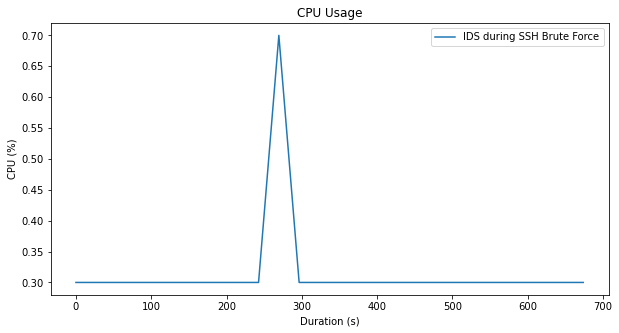

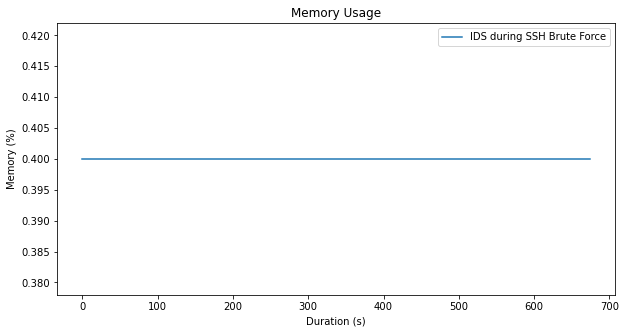

In [5]:

import matplotlib.pyplot as plt


    
durations = {
"23131":"673.58788",
}

 

data = []
with open('SSH_Logs/SSH_BF_top.txt', 'r') as file:
    for line in file:
        if 'root' in line:
            fields = line.split()
            data.append(fields)


# Separate the data for each root process
root_processes = {}
for entry in data:
    pid = entry[0]
    if pid not in root_processes:
        root_processes[pid] = {'cpu': [], 'mem': []}
    root_processes[pid]['cpu'].append(float(entry[8]))
    root_processes[pid]['mem'].append(float(entry[9]))

# Plotting CPU usage
plt.figure(figsize=(10, 5))
plt.title('CPU Usage')
plt.xlabel('Duration (s)')
plt.ylabel('CPU (%)')

for pid, process_data in root_processes.items():
    # Get the duration for the process
    duration = float(durations.get(pid, 0))
    # Create the x-axis values representing the duration
    time_values = [duration * (i / (len(process_data['cpu']) - 1)) for i in range(len(process_data['cpu']))]
    #plt.plot(time_values, process_data['cpu'], label='Process ' + pid)
    plt.plot(time_values, process_data['cpu'], label='IDS during SSH Brute Force')

plt.legend()
plt.savefig('SSH_Logs/SSH_CPU_RQ1.pdf')
plt.show()

# Plotting memory usage
plt.figure(figsize=(10, 5))
plt.title('Memory Usage')
plt.xlabel('Duration (s)')
plt.ylabel('Memory (%)')

for pid, process_data in root_processes.items():
    # Get the duration for the process
    duration = float(durations.get(pid, 0))
    # Create the x-axis values representing the duration
    time_values = [duration * (i / (len(process_data['mem']) - 1)) for i in range(len(process_data['mem']))]
    #plt.plot(time_values, process_data['mem'], label='Process ' + pid)
    plt.plot(time_values, process_data['mem'], label='IDS during SSH Brute Force')

plt.legend()
plt.savefig('SSH_Logs/SSH_MEM_RQ1.pdf')
plt.show()


# Network scans

Snort conf file with default rules.
Total alerts: 46
Total False Positives: 2 False SSH brute force alert + 7 BAD traffic = 9 alerts


Open ports in the Pi:
SSH, FTP, VNC, UpnP port 5000 (FLASK)

### 1. nmap Target_IP
reponse time to this attack: 18 seconds

```
05/16-17:30:40.948973  [**] [1:1418:11] SNMP request tcp [**] [Classification: Attempted Information Leak] [Priority: 2] {TCP} 192.168.178.75:63811 -> 192.168.178.81:161
05/16-17:30:40.981904  [**] [1:1421:11] SNMP AgentX/tcp request [**] [Classification: Attempted Information Leak] [Priority: 2] {TCP} 192.168.178.75:63811 -> 192.168.178.81:705
^C*** Caught Int-Signal
===============================================================================
===============================================================================
Run time for packet processing was 45.3959 seconds
Snort processed 3712 packets.
Snort ran for 0 days 0 hours 0 minutes 45 seconds
   Pkts/sec:           82
===============================================================================
Packet I/O Totals:
   Received:         3761
   Analyzed:         3712 ( 98.697%)
    Dropped:            0 (  0.000%)
   Filtered:            0 (  0.000%)
Outstanding:           49 (  1.303%)
   Injected:            0
===============================================================================
Action Stats:
     Alerts:            2 (  0.054%)
     Logged:            2 (  0.054%)
     Passed:            0 (  0.000%)
Limits:
      Match:            0
      Queue:            0
        Log:            0
      Event:            2
      Alert:            0
Verdicts:
      Allow:         3712 ( 98.697%)
      Block:            0 (  0.000%)
    Replace:            0 (  0.000%)
  AllowFlow:            0 (  0.000%)
  BlockFlow:            0 (  0.000%)
     Ignore:            0 (  0.000%)
      Retry:            0 (  0.000%)
===============================================================================

```


### 2. nmap -sS Target_IP
reponse time to this attack: 17.9 seconds

```
05/16-17:32:09.987227  [**] [1:1418:11] SNMP request tcp [**] [Classification: Attempted Information Leak] [Priority: 2] {TCP} 192.168.178.75:63342 -> 192.168.178.81:161
05/16-17:32:10.004031  [**] [1:1421:11] SNMP AgentX/tcp request [**] [Classification: Attempted Information Leak] [Priority: 2] {TCP} 192.168.178.75:63342 -> 192.168.178.81:705
^C*** Caught Int-Signal
===============================================================================
Run time for packet processing was 42.4000 seconds
Snort processed 3537 packets.
Snort ran for 0 days 0 hours 0 minutes 42 seconds
   Pkts/sec:           84
===============================================================================
Packet I/O Totals:
   Received:         3602
   Analyzed:         3537 ( 98.195%)
    Dropped:            0 (  0.000%)
   Filtered:            0 (  0.000%)
Outstanding:           65 (  1.805%)
   Injected:            0
===============================================================================
Action Stats:
     Alerts:            2 (  0.057%)
     Logged:            2 (  0.057%)
     Passed:            0 (  0.000%)
Limits:
      Match:            0
      Queue:            0
        Log:            0
      Event:            2
      Alert:            0
Verdicts:
      Allow:         3537 ( 98.195%)
      Block:            0 (  0.000%)
    Replace:            0 (  0.000%)
  AllowFlow:            0 (  0.000%)
  BlockFlow:            0 (  0.000%)
     Ignore:            0 (  0.000%)
      Retry:            0 (  0.000%)
===============================================================================

```
### 3. nmap -sT Target_IP
reponse time to this attack: 17.88 seconds


```
05/16-17:33:42.675065  [**] [1:1418:11] SNMP request tcp [**] [Classification: Attempted Information Leak] [Priority: 2] {TCP} 192.168.178.75:43142 -> 192.168.178.81:161
05/16-17:33:42.733055  [**] [1:1421:11] SNMP AgentX/tcp request [**] [Classification: Attempted Information Leak] [Priority: 2] {TCP} 192.168.178.75:59720 -> 192.168.178.81:705
^C*** Caught Int-Signal
===============================================================================
Run time for packet processing was 35.3360 seconds
Snort processed 3223 packets.
Snort ran for 0 days 0 hours 0 minutes 35 seconds
   Pkts/sec:           92
===============================================================================
Packet I/O Totals:
   Received:         3276
   Analyzed:         3223 ( 98.382%)
    Dropped:            0 (  0.000%)
   Filtered:            0 (  0.000%)
Outstanding:           53 (  1.618%)
   Injected:            0
===============================================================================
Action Stats:
     Alerts:            2 (  0.062%)
     Logged:            2 (  0.062%)
     Passed:            0 (  0.000%)
Limits:
      Match:            0
      Queue:            0
        Log:            0
      Event:            3
      Alert:            0
Verdicts:
      Allow:         3223 ( 98.382%)
      Block:            0 (  0.000%)
    Replace:            0 (  0.000%)
  AllowFlow:            0 (  0.000%)
  BlockFlow:            0 (  0.000%)
     Ignore:            0 (  0.000%)
      Retry:            0 (  0.000%)
===============================================================================

```


### 4. nmap -sA Target_IP
reponse time to this attack: 17.88 seconds

```
05/16-17:34:54.910668  [**] [1:1418:11] SNMP request tcp [**] [Classification: Attempted Information Leak] [Priority: 2] {TCP} 192.168.178.75:55395 -> 192.168.178.81:161
05/16-17:34:54.990951  [**] [1:1421:11] SNMP AgentX/tcp request [**] [Classification: Attempted Information Leak] [Priority: 2] {TCP} 192.168.178.75:55395 -> 192.168.178.81:705
^C*** Caught Int-Signal
===============================================================================
Run time for packet processing was 47.4640 seconds
Snort processed 3712 packets.
Snort ran for 0 days 0 hours 0 minutes 47 seconds
   Pkts/sec:           78
===============================================================================
Packet I/O Totals:
   Received:         3738
   Analyzed:         3712 ( 99.304%)
    Dropped:            0 (  0.000%)
   Filtered:            0 (  0.000%)
Outstanding:           26 (  0.696%)
   Injected:            0
===============================================================================
Action Stats:
     Alerts:            2 (  0.054%)
     Logged:            2 (  0.054%)
     Passed:            0 (  0.000%)
Limits:
      Match:            0
      Queue:            0
        Log:            0
      Event:            1
      Alert:            0
Verdicts:
      Allow:         3712 ( 99.304%)
      Block:            0 (  0.000%)
    Replace:            0 (  0.000%)
  AllowFlow:            0 (  0.000%)
  BlockFlow:            0 (  0.000%)
     Ignore:            0 (  0.000%)
      Retry:            0 (  0.000%)
===============================================================================


```


### 5. nmap -sW Target_IP
reponse time to this attack: 17.9 seconds

```
05/16-17:35:54.193119  [**] [1:1418:11] SNMP request tcp [**] [Classification: Attempted Information Leak] [Priority: 2] {TCP} 192.168.178.75:46212 -> 192.168.178.81:161
05/16-17:35:54.224588  [**] [1:1421:11] SNMP AgentX/tcp request [**] [Classification: Attempted Information Leak] [Priority: 2] {TCP} 192.168.178.75:46212 -> 192.168.178.81:705
^C*** Caught Int-Signal
===============================================================================
Run time for packet processing was 38.137482 seconds
Snort processed 3325 packets.
Snort ran for 0 days 0 hours 0 minutes 38 seconds
   Pkts/sec:           87
===============================================================================

Packet I/O Totals:
   Received:         3372
   Analyzed:         3325 ( 98.606%)
    Dropped:            0 (  0.000%)
   Filtered:            0 (  0.000%)
Outstanding:           47 (  1.394%)
   Injected:            0
===============================================================================
Action Stats:
     Alerts:            2 (  0.060%)
     Logged:            2 (  0.060%)
     Passed:            0 (  0.000%)
Limits:
      Match:            0
      Queue:            0
        Log:            0
      Event:            1
      Alert:            0
Verdicts:
      Allow:         3325 ( 98.606%)
      Block:            0 (  0.000%)
    Replace:            0 (  0.000%)
  AllowFlow:            0 (  0.000%)
  BlockFlow:            0 (  0.000%)
     Ignore:            0 (  0.000%)
      Retry:            0 (  0.000%)
===============================================================================


```



### 6. nmap -sM Target_IP
reponse time to this attack: 17.81 seconds

```
05/16-17:36:58.437699  [**] [1:1418:11] SNMP request tcp [**] [Classification: Attempted Information Leak] [Priority: 2] {TCP} 192.168.178.75:40089 -> 192.168.178.81:161
05/16-17:36:58.454647  [**] [1:1421:11] SNMP AgentX/tcp request [**] [Classification: Attempted Information Leak] [Priority: 2] {TCP} 192.168.178.75:40089 -> 192.168.178.81:705
^C*** Caught Int-Signal
===============================================================================
Run time for packet processing was 43.3818 seconds
Snort processed 3522 packets.
Snort ran for 0 days 0 hours 0 minutes 43 seconds
   Pkts/sec:           81
===============================================================================
Packet I/O Totals:
   Received:         3568
   Analyzed:         3522 ( 98.711%)
    Dropped:            0 (  0.000%)
   Filtered:            0 (  0.000%)
Outstanding:           46 (  1.289%)
   Injected:            0
===============================================================================
Action Stats:
     Alerts:            2 (  0.057%)
     Logged:            2 (  0.057%)
     Passed:            0 (  0.000%)
Limits:
      Match:            0
      Queue:            0
        Log:            0
      Event:            1
      Alert:            0
Verdicts:
      Allow:         3522 ( 98.711%)
      Block:            0 (  0.000%)
    Replace:            0 (  0.000%)
  AllowFlow:            0 (  0.000%)
  BlockFlow:            0 (  0.000%)
     Ignore:            0 (  0.000%)
      Retry:            0 (  0.000%)
===============================================================================
```


### 7. nmap Target_IP -PR
reponse time to this attack: 17.77 seconds

```
05/16-17:38:09.386694  [**] [1:1421:11] SNMP AgentX/tcp request [**] [Classification: Attempted Information Leak] [Priority: 2] {TCP} 192.168.178.75:44592 -> 192.168.178.81:705
05/16-17:38:09.488635  [**] [1:1418:11] SNMP request tcp [**] [Classification: Attempted Information Leak] [Priority: 2] {TCP} 192.168.178.75:44592 -> 192.168.178.81:161
^C*** Caught Int-Signal
===============================================================================
Run time for packet processing was 54.5550 seconds
Snort processed 3865 packets.
Snort ran for 0 days 0 hours 0 minutes 54 seconds
   Pkts/sec:           71
===============================================================================
Packet I/O Totals:
   Received:         3894
   Analyzed:         3865 ( 99.255%)
    Dropped:            0 (  0.000%)
   Filtered:            0 (  0.000%)
Outstanding:           29 (  0.745%)
   Injected:            0
===============================================================================
Action Stats:
     Alerts:            2 (  0.052%)
     Logged:            2 (  0.052%)
     Passed:            0 (  0.000%)
Limits:
      Match:            0
      Queue:            0
        Log:            0
      Event:            2
      Alert:            0
Verdicts:
      Allow:         3865 ( 99.255%)
      Block:            0 (  0.000%)
    Replace:            0 (  0.000%)
  AllowFlow:            0 (  0.000%)
  BlockFlow:            0 (  0.000%)
     Ignore:            0 (  0.000%)
      Retry:            0 (  0.000%)
===============================================================================

```
### 8. nmap Target_IP -sV 
reponse time to this attack: 18.18 seconds

```
05/16-17:39:25.627151  [**] [1:1421:11] SNMP AgentX/tcp request [**] [Classification: Attempted Information Leak] [Priority: 2] {TCP} 192.168.178.75:49011 -> 192.168.178.81:705
05/16-17:39:25.659494  [**] [1:1418:11] SNMP request tcp [**] [Classification: Attempted Information Leak] [Priority: 2] {TCP} 192.168.178.75:49011 -> 192.168.178.81:161
^C*** Caught Int-Signal
===============================================================================
Run time for packet processing was 154.15188 seconds
Snort processed 7996 packets.
Snort ran for 0 days 0 hours 2 minutes 34 seconds
   Pkts/min:         3998
   Pkts/sec:           51
===============================================================================
Packet I/O Totals:
   Received:         8024
   Analyzed:         7996 ( 99.651%)
    Dropped:            0 (  0.000%)
   Filtered:            0 (  0.000%)
Outstanding:           28 (  0.349%)
   Injected:            0
===============================================================================
Action Stats:
     Alerts:            2 (  0.025%)
     Logged:            2 (  0.025%)
     Passed:            0 (  0.000%)
Limits:
      Match:            0
      Queue:            0
        Log:            0
      Event:          175
      Alert:            0
Verdicts:
      Allow:         7996 ( 99.651%)
      Block:            0 (  0.000%)
    Replace:            0 (  0.000%)
  AllowFlow:            0 (  0.000%)
  BlockFlow:            0 (  0.000%)
     Ignore:            0 (  0.000%)
      Retry:            0 (  0.000%)
===============================================================================

```
### 9. nmap Target_IP -A
reponse time to this attack: 18.53 seconds

```

05/16-17:42:22.428602  [**] [1:1421:11] SNMP AgentX/tcp request [**] [Classification: Attempted Information Leak] [Priority: 2] {TCP} 192.168.178.75:42539 -> 192.168.178.81:705
05/16-17:42:22.443143  [**] [1:1418:11] SNMP request tcp [**] [Classification: Attempted Information Leak] [Priority: 2] {TCP} 192.168.178.75:42539 -> 192.168.178.81:161
05/16-17:43:54.764001  [**] [1:1228:7] SCAN nmap XMAS [**] [Classification: Attempted Information Leak] [Priority: 2] {TCP} 192.168.178.75:63991 -> 192.168.178.81:1
05/16-17:43:56.953401  [**] [1:10000015:1] SSH Brute Force Attempt [**] [Priority: 0] {TCP} 192.168.178.75:33822 -> 192.168.178.81:22
^C*** Caught Int-Signal
===============================================================================
Run time for packet processing was 177.14793 seconds
Snort processed 8933 packets.
Snort ran for 0 days 0 hours 2 minutes 57 seconds
   Pkts/min:         4466
   Pkts/sec:           50
===============================================================================
Packet I/O Totals:
   Received:         8965
   Analyzed:         8933 ( 99.643%)
    Dropped:            0 (  0.000%)
   Filtered:            0 (  0.000%)
Outstanding:           32 (  0.357%)
   Injected:            0
===============================================================================
Action Stats:
     Alerts:            4 (  0.045%)
     Logged:            4 (  0.045%)
     Passed:            0 (  0.000%)
Limits:
      Match:            0
      Queue:            0
        Log:            0
      Event:          180
      Alert:            0
Verdicts:
      Allow:         8933 ( 99.643%)
      Block:            0 (  0.000%)
    Replace:            0 (  0.000%)
  AllowFlow:            0 (  0.000%)
  BlockFlow:            0 (  0.000%)
     Ignore:            0 (  0.000%)
      Retry:            0 (  0.000%)
===============================================================================
```
### 10. nmap Target_IP -O
reponse time to this attack: 17.92 seconds

```
05/16-17:45:37.123266  [**] [1:1421:11] SNMP AgentX/tcp request [**] [Classification: Attempted Information Leak] [Priority: 2] {TCP} 192.168.178.75:64046 -> 192.168.178.81:705
05/16-17:45:37.128623  [**] [1:1418:11] SNMP request tcp [**] [Classification: Attempted Information Leak] [Priority: 2] {TCP} 192.168.178.75:64046 -> 192.168.178.81:161
05/16-17:45:38.096663  [**] [1:1228:7] SCAN nmap XMAS [**] [Classification: Attempted Information Leak] [Priority: 2] {TCP} 192.168.178.75:35461 -> 192.168.178.81:1
^C*** Caught Int-Signal
===============================================================================
Run time for packet processing was 50.4517 seconds
Snort processed 3802 packets.
Snort ran for 0 days 0 hours 0 minutes 50 seconds
   Pkts/sec:           76
===============================================================================
Packet I/O Totals:
   Received:         3850
   Analyzed:         3802 ( 98.753%)
    Dropped:            0 (  0.000%)
   Filtered:            0 (  0.000%)
Outstanding:           48 (  1.247%)
   Injected:            0
===============================================================================
Action Stats:
     Alerts:            3 (  0.079%)
     Logged:            3 (  0.079%)
     Passed:            0 (  0.000%)
Limits:
      Match:            0
      Queue:            0
        Log:            0
      Event:            2
      Alert:            0
Verdicts:
      Allow:         3802 ( 98.753%)
      Block:            0 (  0.000%)
    Replace:            0 (  0.000%)
  AllowFlow:            0 (  0.000%)
  BlockFlow:            0 (  0.000%)
     Ignore:            0 (  0.000%)
      Retry:            0 (  0.000%)
===============================================================================

```
### 11. nmap Target_IP -sC
reponse time to this attack: 17.96 seconds

```
05/16-17:47:00.080158  [**] [1:1421:11] SNMP AgentX/tcp request [**] [Classification: Attempted Information Leak] [Priority: 2] {TCP} 192.168.178.75:58383 -> 192.168.178.81:705
05/16-17:47:00.083918  [**] [1:1418:11] SNMP request tcp [**] [Classification: Attempted Information Leak] [Priority: 2] {TCP} 192.168.178.75:58383 -> 192.168.178.81:161
05/16-17:47:01.960041  [**] [1:10000015:1] SSH Brute Force Attempt [**] [Priority: 0] {TCP} 192.168.178.75:36708 -> 192.168.178.81:22
^C*** Caught Int-Signal
===============================================================================
Run time for packet processing was 62.5569 seconds
Snort processed 4541 packets.
Snort ran for 0 days 0 hours 1 minutes 2 seconds
   Pkts/min:         4541
   Pkts/sec:           73
===============================================================================
Packet I/O Totals:
   Received:         4584
   Analyzed:         4541 ( 99.062%)
    Dropped:            0 (  0.000%)
   Filtered:            0 (  0.000%)
Outstanding:           43 (  0.938%)
   Injected:            0
===============================================================================
Action Stats:
     Alerts:            3 (  0.066%)
     Logged:            3 (  0.066%)
     Passed:            0 (  0.000%)
Limits:
      Match:            0
      Queue:            0
        Log:            0
      Event:            8
      Alert:            0
Verdicts:
      Allow:         4541 ( 99.062%)
      Block:            0 (  0.000%)
    Replace:            0 (  0.000%)
  AllowFlow:            0 (  0.000%)
  BlockFlow:            0 (  0.000%)
     Ignore:            0 (  0.000%)
      Retry:            0 (  0.000%)
===============================================================================


```
### 12. nmap -sU Target_IP
reponse time to this attack: 88.32 seconds

```

Commencing packet processing (pid=30429)
05/16-17:49:39.821011  [**] [1:1419:9] SNMP trap udp [**] [Classification: Attempted Information Leak] [Priority: 2] {UDP} 192.168.178.75:55655 -> 192.168.178.81:162
05/16-17:49:40.622105  [**] [1:1419:9] SNMP trap udp [**] [Classification: Attempted Information Leak] [Priority: 2] {UDP} 192.168.178.75:55657 -> 192.168.178.81:162
05/16-17:50:49.467662  [**] [1:1417:9] SNMP request udp [**] [Classification: Attempted Information Leak] [Priority: 2] {UDP} 192.168.178.75:55655 -> 192.168.178.81:161
05/16-17:50:49.467672  [**] [1:1411:10] SNMP public access udp [**] [Classification: Attempted Information Leak] [Priority: 2] {UDP} 192.168.178.75:55655 -> 192.168.178.81:161
05/16-17:50:49.467672  [**] [1:1417:9] SNMP request udp [**] [Classification: Attempted Information Leak] [Priority: 2] {UDP} 192.168.178.75:55655 -> 192.168.178.81:161
05/16-17:51:34.303473  [**] [1:1917:6] SCAN UPnP service discover attempt [**] [Classification: Detection of a Network Scan] [Priority: 3] {UDP} 192.168.178.75:55655 -> 192.168.178.81:1900
05/16-17:53:43.198271  [**] [1:1616:7] DNS named version attempt [**] [Classification: Attempted Information Leak] [Priority: 2] {UDP} 192.168.178.75:55655 -> 192.168.178.81:53
05/16-17:57:16.961418  [**] [1:237:2] DDOS Trin00 Master to Daemon default password attempt [**] [Classification: Attempted Denial of Service] [Priority: 2] {UDP} 192.168.178.75:55655 -> 192.168.178.81:27444
05/16-17:57:17.762072  [**] [1:237:2] DDOS Trin00 Master to Daemon default password attempt [**] [Classification: Attempted Denial of Service] [Priority: 2] {UDP} 192.168.178.75:55657 -> 192.168.178.81:27444
05/16-17:59:29.970629  [**] [1:527:8] BAD-TRAFFIC same SRC/DST [**] [Classification: Potentially Bad Traffic] [Priority: 2] {UDP} 0.0.0.0:68 -> 255.255.255.255:67
05/16-17:59:39.458509  [**] [1:1867:1] MISC xdmcp info query [**] [Classification: Attempted Information Leak] [Priority: 2] {UDP} 192.168.178.75:55655 -> 192.168.178.81:177
05/16-17:59:48.266113  [**] [1:566:4] POLICY PCAnywhere server response [**] [Classification: Misc activity] [Priority: 3] {UDP} 192.168.178.75:55655 -> 192.168.178.81:5632
05/16-18:00:30.060506  [**] [1:527:8] BAD-TRAFFIC same SRC/DST [**] [Classification: Potentially Bad Traffic] [Priority: 2] {UDP} 0.0.0.0:68 -> 255.255.255.255:67
05/16-18:00:48.309300  [**] [1:2339:2] TFTP NULL command attempt [**] [Classification: Potentially Bad Traffic] [Priority: 2] {UDP} 192.168.178.75:55655 -> 192.168.178.81:69
05/16-18:00:48.309300  [**] [1:1444:3] TFTP Get [**] [Classification: Potentially Bad Traffic] [Priority: 2] {UDP} 192.168.178.75:55655 -> 192.168.178.81:69
05/16-18:01:30.311850  [**] [1:527:8] BAD-TRAFFIC same SRC/DST [**] [Classification: Potentially Bad Traffic] [Priority: 2] {UDP} 0.0.0.0:68 -> 255.255.255.255:67
05/16-18:01:45.146197  [**] [1:634:2] SCAN Amanda client version request [**] [Classification: Attempted Information Leak] [Priority: 2] {UDP} 192.168.178.75:55655 -> 192.168.178.81:10080
05/16-18:02:31.291372  [**] [1:527:8] BAD-TRAFFIC same SRC/DST [**] [Classification: Potentially Bad Traffic] [Priority: 2] {UDP} 0.0.0.0:68 -> 255.255.255.255:67
05/16-18:03:32.243941  [**] [1:527:8] BAD-TRAFFIC same SRC/DST [**] [Classification: Potentially Bad Traffic] [Priority: 2] {UDP} 0.0.0.0:68 -> 255.255.255.255:67
05/16-18:04:32.530530  [**] [1:527:8] BAD-TRAFFIC same SRC/DST [**] [Classification: Potentially Bad Traffic] [Priority: 2] {UDP} 0.0.0.0:68 -> 255.255.255.255:67
05/16-18:05:32.503074  [**] [1:527:8] BAD-TRAFFIC same SRC/DST [**] [Classification: Potentially Bad Traffic] [Priority: 2] {UDP} 0.0.0.0:68 -> 255.255.255.255:67
^C*** Caught Int-Signal
===============================================================================
Run time for packet processing was 1076.107449 seconds
Snort processed 40832 packets.
Snort ran for 0 days 0 hours 17 minutes 56 seconds
   Pkts/min:         2401
   Pkts/sec:           37
===============================================================================
Packet I/O Totals:
   Received:        40861
   Analyzed:        40832 ( 99.929%)
    Dropped:            0 (  0.000%)
   Filtered:            0 (  0.000%)
Outstanding:           29 (  0.071%)
   Injected:            0
===============================================================================
Action Stats:
     Alerts:           21 (  0.051%)
     Logged:           21 (  0.051%)
     Passed:            0 (  0.000%)
Limits:
      Match:            0
      Queue:            0
        Log:            0
      Event:            0
      Alert:            0
Verdicts:
      Allow:        40832 ( 99.929%)
      Block:            0 (  0.000%)
    Replace:            0 (  0.000%)
  AllowFlow:            0 (  0.000%)
  BlockFlow:            0 (  0.000%)
     Ignore:            0 (  0.000%)
      Retry:            0 (  0.000%)
===============================================================================

```

## Scan Attacks without UDP scanning (Since UDP takes too long to show on the graph)

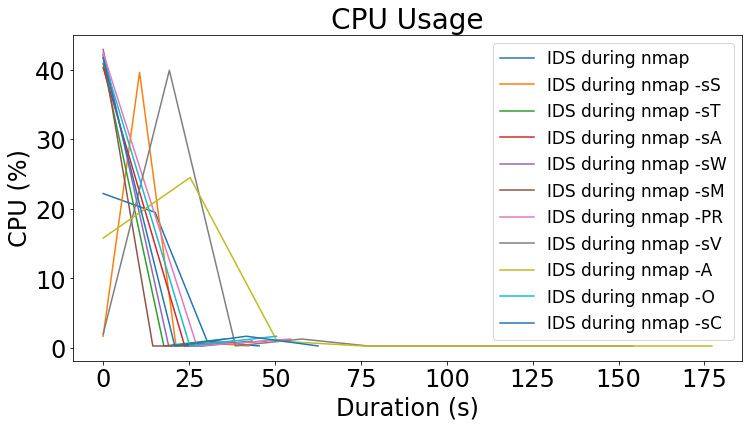

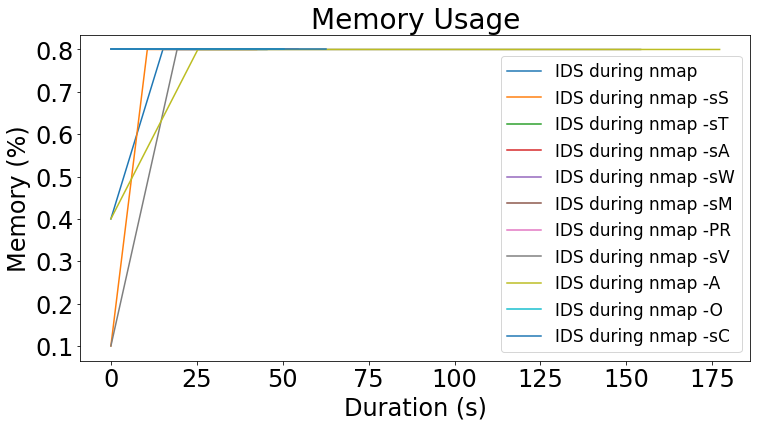

In [40]:
import matplotlib.pyplot as plt

# Sample data (replace with your actual data)
# data = [
#     ['19206', 'root', '20', '0', '57872', '34572', '5092', 'R', '22.2', '0.4', '0:00.67', 'snort'],
#     ['19206', 'root', '20', '0', '94612', '62552', '5092', 'S', '19.5', '0.8', '0:01.26', 'snort'],
#     ['19206', 'root', '20', '0', '94876', '64788', '7232', 'S', '1.0', '0.8', '0:01.29', 'snort'],
#     ['19206', 'root', '20', '0', '92828', '62940', '5184', 'S', '0.3', '0.8', '0:01.30', 'snort'],
#     ['20091', 'root', '20', '0', '33180', '11740', '3604', 'D', '1.7', '0.1', '0:00.05', 'snort'],
#     ['20091', 'root', '20', '0', '94028', '66200', '7288', 'S', '39.6', '0.8', '0:01.25', 'snort'],
#     ['20091', 'root', '20', '0', '94028', '66200', '7288', 'S', '0.3', '0.8', '0:01.26', 'snort'],
#     ['20091', 'root', '20', '0', '94688', '66676', '7288', 'S', '0.7', '0.8', '0:01.28', 'snort'],
#     ['20091', 'root', '20', '0', '94820', '66676', '7288', 'S', '0.3', '0.8', '0:01.29', 'snort']
# ]

data = []
with open('Nmap_Logs/ScanAttacks_top.txt', 'r') as file:
    for line in file:
        if 'root' in line and '30429' not in line:
            fields = line.split()
            data.append(fields)
            
            
# Dictionary containing the durations for each PID process
durations = {
    "19206": "45.3959",
    "20091": "42.4",
    "21050": "35.3360",
    "21714": "47.4640",
    "22436": "38.137482",
    "23058": "43.3818",
    "23739": "54.555",
    "24588": "154.15188",
    "26413": "177.14793",
    "28606": "50.4517",
    "29379": "62.5569",
    "30429": "1076.1"
}


Nnames = {
    "19206": "IDS during nmap",
    "20091": "IDS during nmap -sS",
    "21050": "IDS during nmap -sT",
    "21714": "IDS during nmap -sA",
    "22436": "IDS during nmap -sW",
    "23058": "IDS during nmap -sM",
    "23739": "IDS during nmap -PR",
    "24588": "IDS during nmap -sV",
    "26413": "IDS during nmap -A",
    "28606": "IDS during nmap -O",
    "29379": "IDS during nmap -sC",
    "30429": "IDS during nmap -sU"
}

# Separate the data for each root process
root_processes = {}
for entry in data:
    pid = entry[0]
    if pid not in root_processes:
        root_processes[pid] = {'cpu': [], 'mem': []}
    root_processes[pid]['cpu'].append(float(entry[8]))
    root_processes[pid]['mem'].append(float(entry[9]))

# Plotting CPU usage
plt.rcParams.update({'font.size': 17})
# plt.figure(figsize=(10, 5))
plt.figure(figsize=(12, 6))
plt.title('CPU Usage', fontsize=28)
plt.xlabel('Duration (s)', fontsize=24)
plt.ylabel('CPU (%)', fontsize=24)

plt.xticks(fontsize=24)
plt.yticks(fontsize=24)

for pid, process_data in root_processes.items():
    # Get the duration for the process
    duration = float(durations.get(pid, 0))
    # Create the x-axis values representing the duration
    time_values = [duration * (i / (len(process_data['cpu']) - 1)) for i in range(len(process_data['cpu']))]
    #plt.plot(time_values, process_data['cpu'], label='Process ' + pid)
    plt.plot(time_values, process_data['cpu'], label=Nnames[pid])

plt.legend()
plt.savefig('Nmap_Logs/ScanAttacks_CPU_RQ1.pdf')
plt.show()

# Plotting memory usage
# plt.figure(figsize=(10, 5))
plt.figure(figsize=(12, 6))
plt.title('Memory Usage', fontsize=28)
plt.xlabel('Duration (s)', fontsize=24)
plt.ylabel('Memory (%)', fontsize=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)

for pid, process_data in root_processes.items():
    # Get the duration for the process
    duration = float(durations.get(pid, 0))
    # Create the x-axis values representing the duration
    time_values = [duration * (i / (len(process_data['mem']) - 1)) for i in range(len(process_data['mem']))]
    #plt.plot(time_values, process_data['mem'], label='Process ' + pid)
    plt.plot(time_values, process_data['mem'], label=Nnames[pid])

plt.legend()
plt.savefig('Nmap_Logs/ScanAttacks_MEM_RQ1.pdf')
plt.show()


## Nmap UDP scan

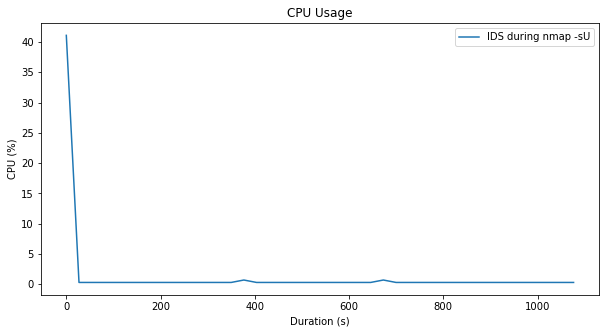

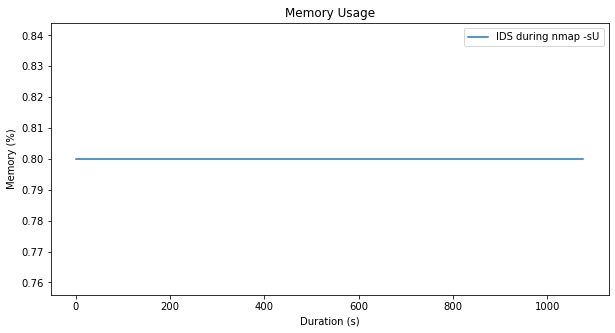

In [10]:
import matplotlib.pyplot as plt

data = []
# duration in seconds, key = PID process, value- duration of the process
durations = {"30429": "1076.107449",
                }

with open('Nmap_Logs/ScanAttacks_top.txt', 'r') as file:
    for line in file:
        if 'root' in line and '30429' in line:
            fields = line.split()
            data.append(fields)

# Separate the data for each root process
root_processes = {}
for entry in data:
    pid = entry[0]
    if pid not in root_processes:
        root_processes[pid] = {'cpu': [], 'mem': []}
    root_processes[pid]['cpu'].append(float(entry[8]))
    root_processes[pid]['mem'].append(float(entry[9]))

# Get the duration for the process
duration = float(durations.get("30429", 0))

# Create the x-axis values representing the duration
time_values = [duration * (i / (len(data) - 1)) for i in range(len(data))]

# Plotting CPU usage
plt.figure(figsize=(10, 5))
plt.title('CPU Usage')
plt.xlabel('Duration (s)')
plt.ylabel('CPU (%)')
for pid, process_data in root_processes.items():
    #plt.plot(time_values, process_data['cpu'], label='Process ' + pid)
    plt.plot(time_values, process_data['cpu'], label='IDS during nmap -sU')
plt.legend()
plt.savefig('Nmap_Logs/ScanAttacks_UDP_CPU_RQ1.pdf')
plt.show()

# Plotting memory usage
plt.figure(figsize=(10, 5))
plt.title('Memory Usage')
plt.xlabel('Duration (s)')
plt.ylabel('Memory (%)')
for pid, process_data in root_processes.items():
    #plt.plot(time_values, process_data['mem'], label='Process ' + pid)
    plt.plot(time_values, process_data['mem'], label='IDS during nmap -sU')
plt.legend()
plt.savefig('Nmap_Logs/ScanAttacks_UDP_MEM_RQ1.pdf')
plt.show()


# MITM

Ettercap arp spoof

response time: 1 second

```
05/21-01:34:44.383183  [**] [129:12:1] Consecutive TCP small segments exceeding threshold [**] [Classification: Potentially Bad Traffic] [Priority: 2] {TCP} 192.168.178.16:57480 -> 192.168.178.81:22
05/21-01:35:23.946374  [**] [129:12:1] Consecutive TCP small segments exceeding threshold [**] [Classification: Potentially Bad Traffic] [Priority: 2] {TCP} 192.168.178.16:57480 -> 192.168.178.81:22
```

```
05/20-19:51:51.633388  [**] [1:469:3] ICMP PING NMAP [**] [Classification: Attempted Information Leak] [Priority: 2] {ICMP} 192.168.178.1 -> 192.168.178.81
05/20-19:51:51.633395  [**] [112:4:1] (spp_arpspoof) Attempted ARP cache overwrite attack [**]
05/20-19:51:52.643208  [**] [112:4:1] (spp_arpspoof) Attempted ARP cache overwrite attack [**]
05/20-19:51:53.652973  [**] [112:4:1] (spp_arpspoof) Attempted ARP cache overwrite attack [**]
05/20-19:51:54.662763  [**] [112:4:1] (spp_arpspoof) Attempted ARP cache overwrite attack [**]
05/20-19:51:55.672573  [**] [112:4:1] (spp_arpspoof) Attempted ARP cache overwrite attack [**]
05/20-19:52:05.678032  [**] [112:4:1] (spp_arpspoof) Attempted ARP cache overwrite attack [**]
05/20-19:52:15.685407  [**] [112:4:1] (spp_arpspoof) Attempted ARP cache overwrite attack [**]
05/20-19:52:25.688875  [**] [112:4:1] (spp_arpspoof) Attempted ARP cache overwrite attack [**]
05/20-19:52:35.696306  [**] [112:4:1] (spp_arpspoof) Attempted ARP cache overwrite attack [**]
05/20-19:52:45.699776  [**] [112:4:1] (spp_arpspoof) Attempted ARP cache overwrite attack [**]
05/20-19:52:55.705195  [**] [112:4:1] (spp_arpspoof) Attempted ARP cache overwrite attack [**]
05/20-19:53:05.713368  [**] [112:4:1] (spp_arpspoof) Attempted ARP cache overwrite attack [**]
05/20-19:53:15.716259  [**] [112:4:1] (spp_arpspoof) Attempted ARP cache overwrite attack [**]
05/20-19:53:25.723647  [**] [112:4:1] (spp_arpspoof) Attempted ARP cache overwrite attack [**]
05/20-19:53:35.728964  [**] [112:4:1] (spp_arpspoof) Attempted ARP cache overwrite attack [**]
05/20-19:53:45.734367  [**] [112:4:1] (spp_arpspoof) Attempted ARP cache overwrite attack [**]
05/20-19:53:55.739831  [**] [112:4:1] (spp_arpspoof) Attempted ARP cache overwrite attack [**]
05/20-19:54:05.743608  [**] [112:4:1] (spp_arpspoof) Attempted ARP cache overwrite attack [**]
05/20-19:54:15.749082  [**] [112:4:1] (spp_arpspoof) Attempted ARP cache overwrite attack [**]
05/20-19:54:25.754560  [**] [112:4:1] (spp_arpspoof) Attempted ARP cache overwrite attack [**]
05/20-19:54:35.761634  [**] [112:4:1] (spp_arpspoof) Attempted ARP cache overwrite attack [**]
05/20-19:54:45.765595  [**] [112:4:1] (spp_arpspoof) Attempted ARP cache overwrite attack [**]
05/20-19:54:55.770993  [**] [112:4:1] (spp_arpspoof) Attempted ARP cache overwrite attack [**]
05/20-19:55:05.776430  [**] [112:4:1] (spp_arpspoof) Attempted ARP cache overwrite attack [**]
05/20-19:55:15.782485  [**] [112:4:1] (spp_arpspoof) Attempted ARP cache overwrite attack [**]
05/20-19:55:25.787929  [**] [112:4:1] (spp_arpspoof) Attempted ARP cache overwrite attack [**]
05/20-19:55:35.793811  [**] [112:4:1] (spp_arpspoof) Attempted ARP cache overwrite attack [**]
05/20-19:55:45.798899  [**] [112:4:1] (spp_arpspoof) Attempted ARP cache overwrite attack [**]
05/20-19:55:55.804367  [**] [112:4:1] (spp_arpspoof) Attempted ARP cache overwrite attack [**]
05/20-19:56:05.809817  [**] [112:4:1] (spp_arpspoof) Attempted ARP cache overwrite attack [**]
05/20-19:56:15.815314  [**] [112:4:1] (spp_arpspoof) Attempted ARP cache overwrite attack [**]
05/20-19:56:25.821084  [**] [112:4:1] (spp_arpspoof) Attempted ARP cache overwrite attack [**]
05/20-19:56:35.826264  [**] [112:4:1] (spp_arpspoof) Attempted ARP cache overwrite attack [**]
05/20-19:56:45.831566  [**] [112:4:1] (spp_arpspoof) Attempted ARP cache overwrite attack [**]
05/20-19:56:55.837093  [**] [112:4:1] (spp_arpspoof) Attempted ARP cache overwrite attack [**]
^C*** Caught Int-Signal
===============================================================================
Run time for packet processing was 340.97310 seconds
Snort processed 23358 packets.
Snort ran for 0 days 0 hours 5 minutes 40 seconds
   Pkts/min:         4671
   Pkts/sec:           68
===============================================================================
Packet I/O Totals:
   Received:        23392
   Analyzed:        23358 ( 99.855%)
    Dropped:            0 (  0.000%)
   Filtered:            0 (  0.000%)
Outstanding:           34 (  0.145%)
   Injected:            0
===============================================================================
===============================================================================
Action Stats:
     Alerts:           36 (  0.154%)
     Logged:           36 (  0.154%)
     Passed:            0 (  0.000%)
Limits:
      Match:            0
      Queue:            0
        Log:            0
      Event:          636
      Alert:            0
Verdicts:
      Allow:        23358 ( 99.855%)
      Block:            0 (  0.000%)
    Replace:            0 (  0.000%)
  AllowFlow:            0 (  0.000%)
  BlockFlow:            0 (  0.000%)
     Ignore:            0 (  0.000%)
      Retry:            0 (  0.000%)
===============================================================================

```





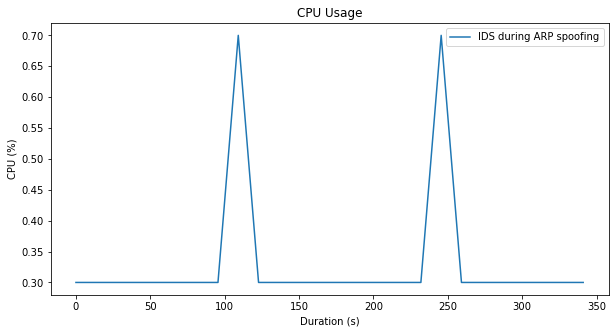

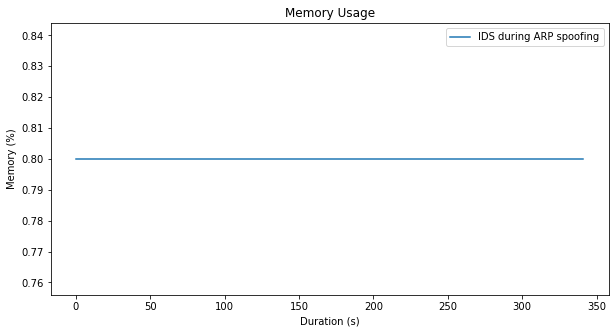

In [15]:

import matplotlib.pyplot as plt


    
durations = {
"12521":"340.97310",
}



data = []
with open('MITM_Logs/MITM_top.txt', 'r') as file:
    for line in file:
        if 'root' in line:
            fields = line.split()
            data.append(fields)


# Separate the data for each root process
root_processes = {}
for entry in data:
    pid = entry[0]
    if pid not in root_processes:
        root_processes[pid] = {'cpu': [], 'mem': []}
    root_processes[pid]['cpu'].append(float(entry[8]))
    root_processes[pid]['mem'].append(float(entry[9]))

# Plotting CPU usage
plt.figure(figsize=(10, 5))
plt.title('CPU Usage')
plt.xlabel('Duration (s)')
plt.ylabel('CPU (%)')

for pid, process_data in root_processes.items():
    # Get the duration for the process
    duration = float(durations.get(pid, 0))
    # Create the x-axis values representing the duration
    time_values = [duration * (i / (len(process_data['cpu']) - 1)) for i in range(len(process_data['cpu']))]
    #plt.plot(time_values, process_data['cpu'], label='Process ' + pid)
    plt.plot(time_values, process_data['cpu'], label='IDS during ARP spoofing')

plt.legend()
plt.savefig('MITM_Logs/ARP_Spoof_CPU_RQ1.pdf')
plt.show()

# Plotting memory usage
plt.figure(figsize=(10, 5))
plt.title('Memory Usage')
plt.xlabel('Duration (s)')
plt.ylabel('Memory (%)')

for pid, process_data in root_processes.items():
    # Get the duration for the process
    duration = float(durations.get(pid, 0))
    # Create the x-axis values representing the duration
    time_values = [duration * (i / (len(process_data['mem']) - 1)) for i in range(len(process_data['mem']))]
    #plt.plot(time_values, process_data['mem'], label='Process ' + pid)
    plt.plot(time_values, process_data['mem'], label='IDS during ARP spoofing')

plt.legend()
plt.savefig('MITM_Logs/ARP_Spoof_MEM_RQ1.pdf')
plt.show()


#  Powertop Resource Table

In [52]:
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt

data = {
    'Attacks': ['ICMP_FLOOD', 'TCP_SYN_FLOOD', 'HTTP_FLOOD', 'SSH_BruteForce', 'NMAP_SCANS', 'ARP_SPOOF'],
    'Duration(seconds)': [320, 320, 260, 490, 340, 340],
    'Usage': ['9.1 ms/s', '31.6 ms/s', '409.2 us/s', '57.4 us/s', '360.3 us/s', '48.8 us/s'],
    'Wakeups/s': ['0.12', '5.0', '0.04', '0.07', '0.13', '0.09'],
}

df = pd.DataFrame(data)

display(df)



# filtered_df = df[df['Attacks'].isin(['ICMP_FLOOD', 'TCP_SYN_FLOOD'])]
# display(filtered_df)

# plt.figure(figsize=(10, 5))
# plt.bar(filtered_df['Attacks'], filtered_df['Usage'])
# plt.xlabel('Attacks')
# plt.ylabel('Usage')
# plt.title('Power Usage by Attack Type')
# plt.show()





,Attacks,Duration(seconds),Usage,Wakeups/s
0,ICMP_FLOOD,320,9.1 ms/s,0.12
1,TCP_SYN_FLOOD,320,31.6 ms/s,5.0
2,HTTP_FLOOD,260,409.2 us/s,0.04
3,SSH_BruteForce,490,57.4 us/s,0.07
4,NMAP_SCANS,340,360.3 us/s,0.13
5,ARP_SPOOF,340,48.8 us/s,0.09


# Attacks Resource Usages under 1 configuration file

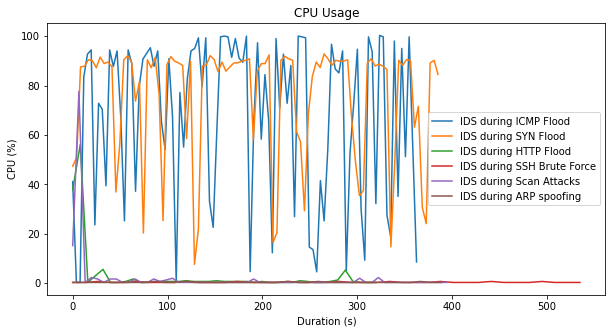

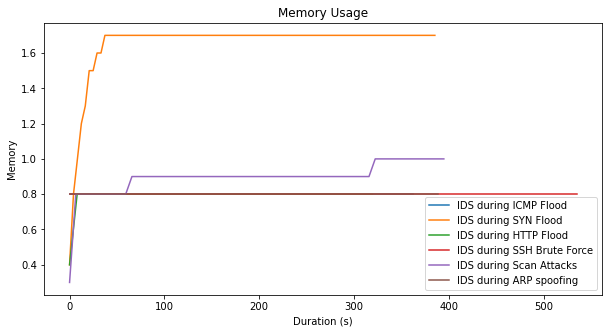

In [12]:

import matplotlib.pyplot as plt







durations = {
"9820":"362.46992",
"15723":"385.10307",
"20309":"319.36838",
"23452":"534.74228",
"2267":"394.54351",
"4961":"388.39205"
}

All_Names = {
"9820":"IDS during ICMP Flood",
"15723":"IDS during SYN Flood",
"20309":"IDS during HTTP Flood",
"23452":"IDS during SSH Brute Force",
"2267":"IDS during Scan Attacks",
"4961":"IDS during ARP spoofing"
}



data = []
with open('Powertop_Resource/All_Resource_Usage.txt', 'r') as file:
    for line in file:
        if 'root' in line:
            fields = line.split()
            data.append(fields)


# Separate the data for each root process
root_processes = {}
for entry in data:
    pid = entry[0]
    if pid not in root_processes:
        root_processes[pid] = {'cpu': [], 'mem': []}
    root_processes[pid]['cpu'].append(float(entry[8]))
    root_processes[pid]['mem'].append(float(entry[9]))

# Plotting CPU usage
plt.figure(figsize=(10, 5))
plt.title('CPU Usage')
plt.xlabel('Duration (s)')
plt.ylabel('CPU (%)')

for pid, process_data in root_processes.items():
    # Get the duration for the process
    duration = float(durations.get(pid, 0))
    # Create the x-axis values representing the duration
    time_values = [duration * (i / (len(process_data['cpu']) - 1)) for i in range(len(process_data['cpu']))]
    #plt.plot(time_values, process_data['cpu'], label='Process ' + pid)
    plt.plot(time_values, process_data['cpu'], label=All_Names[pid])

plt.legend()
plt.savefig('Powertop_Resource/ALL_CPU_RQ1.pdf')
plt.show()

# Plotting memory usage
plt.figure(figsize=(10, 5))
plt.title('Memory Usage')
plt.xlabel('Duration (s)')
plt.ylabel('Memory')

for pid, process_data in root_processes.items():
    # Get the duration for the process
    duration = float(durations.get(pid, 0))
    # Create the x-axis values representing the duration
    time_values = [duration * (i / (len(process_data['mem']) - 1)) for i in range(len(process_data['mem']))]
    #plt.plot(time_values, process_data['mem'], label='Process ' + pid)
    plt.plot(time_values, process_data['mem'], label=All_Names[pid])

plt.legend()
plt.savefig('Powertop_Resource/ALL_MEM_RQ1.pdf')
plt.show()






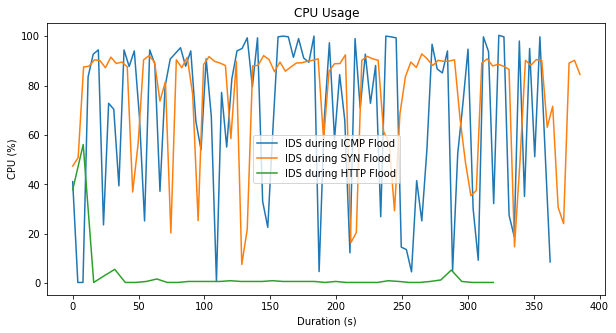

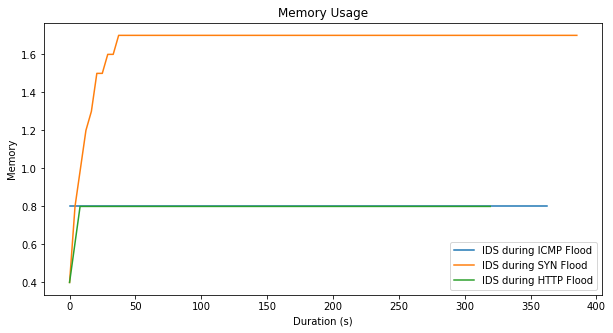

In [13]:
import matplotlib.pyplot as plt


    
durations = {
"9820":"362.46992",
"15723":"385.10307",
"20309":"319.36838",
"23452":"534.74228",
"2267":"394.54351",
"4961":"388.39205"
}

All_Names = {
"9820":"IDS during ICMP Flood",
"15723":"IDS during SYN Flood",
"20309":"IDS during HTTP Flood",
"23452":"IDS during SSH Brute Force",
"2267":"IDS during Scan Attacks",
"4961":"IDS during ARP spoofing"
}




data = []
with open('Powertop_Resource/DOSAttacks_Resource_Usage.txt', 'r') as file:
    for line in file:
        if 'root' in line:
            fields = line.split()
            data.append(fields)


# Separate the data for each root process
root_processes = {}
for entry in data:
    pid = entry[0]
    if pid not in root_processes:
        root_processes[pid] = {'cpu': [], 'mem': []}
    root_processes[pid]['cpu'].append(float(entry[8]))
    root_processes[pid]['mem'].append(float(entry[9]))

# Plotting CPU usage
plt.figure(figsize=(10, 5))
plt.title('CPU Usage')
plt.xlabel('Duration (s)')
plt.ylabel('CPU (%)')

for pid, process_data in root_processes.items():
    # Get the duration for the process
    duration = float(durations.get(pid, 0))
    # Create the x-axis values representing the duration
    time_values = [duration * (i / (len(process_data['cpu']) - 1)) for i in range(len(process_data['cpu']))]
    #plt.plot(time_values, process_data['cpu'], label='Process ' + pid)
    plt.plot(time_values, process_data['cpu'], label=All_Names[pid])
    

plt.legend()
plt.savefig('Powertop_Resource/ALL_DOS_CPU_RQ1.pdf')
plt.show()

# Plotting memory usage
plt.figure(figsize=(10, 5))
plt.title('Memory Usage')
plt.xlabel('Duration (s)')
plt.ylabel('Memory')

for pid, process_data in root_processes.items():
    # Get the duration for the process
    duration = float(durations.get(pid, 0))
    # Create the x-axis values representing the duration
    time_values = [duration * (i / (len(process_data['mem']) - 1)) for i in range(len(process_data['mem']))]
    #plt.plot(time_values, process_data['mem'], label='Process ' + pid)
    plt.plot(time_values, process_data['mem'], label=All_Names[pid])

plt.legend()
plt.savefig('Powertop_Resource/ALL_DOS_MEM_RQ1.pdf')
plt.show()






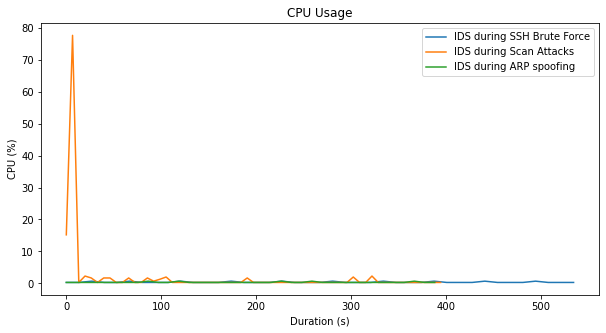

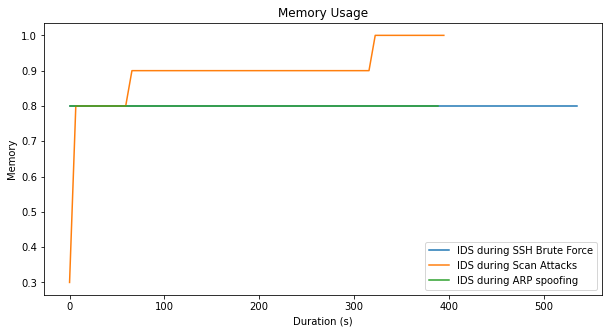

In [14]:

    
    
import matplotlib.pyplot as plt


    
durations = {
"9820":"362.46992",
"15723":"385.10307",
"20309":"319.36838",
"23452":"534.74228",
"2267":"394.54351",
"4961":"388.39205"
}

All_Names = {
"9820":"IDS during ICMP Flood",
"15723":"IDS during SYN Flood",
"20309":"IDS during HTTP Flood",
"23452":"IDS during SSH Brute Force",
"2267":"IDS during Scan Attacks",
"4961":"IDS during ARP spoofing"
}




data = []
with open('Powertop_Resource/Scan_BF_Arp_Resource_Usage.txt', 'r') as file:
    for line in file:
        if 'root' in line:
            fields = line.split()
            data.append(fields)


# Separate the data for each root process
root_processes = {}
for entry in data:
    pid = entry[0]
    if pid not in root_processes:
        root_processes[pid] = {'cpu': [], 'mem': []}
    root_processes[pid]['cpu'].append(float(entry[8]))
    root_processes[pid]['mem'].append(float(entry[9]))

# Plotting CPU usage
plt.figure(figsize=(10, 5))
plt.title('CPU Usage')
plt.xlabel('Duration (s)')
plt.ylabel('CPU (%)')

for pid, process_data in root_processes.items():
    # Get the duration for the process
    duration = float(durations.get(pid, 0))
    # Create the x-axis values representing the duration
    time_values = [duration * (i / (len(process_data['cpu']) - 1)) for i in range(len(process_data['cpu']))]
    #plt.plot(time_values, process_data['cpu'], label='Process ' + pid)
    plt.plot(time_values, process_data['cpu'], label=All_Names[pid])

plt.legend()
plt.savefig('Powertop_Resource/Scan_BF_ARP_CPU_RQ1.pdf')
plt.show()

# Plotting memory usage
plt.figure(figsize=(10, 5))
plt.title('Memory Usage')
plt.xlabel('Duration (s)')
plt.ylabel('Memory')

for pid, process_data in root_processes.items():
    # Get the duration for the process
    duration = float(durations.get(pid, 0))
    # Create the x-axis values representing the duration
    time_values = [duration * (i / (len(process_data['mem']) - 1)) for i in range(len(process_data['mem']))]
    #plt.plot(time_values, process_data['mem'], label='Process ' + pid)
    plt.plot(time_values, process_data['mem'], label=All_Names[pid])

plt.legend()
plt.savefig('Powertop_Resource/Scan_BF_ARP_MEM_RQ1.pdf')
plt.show()



 

